# Precipitation over the Trento Province during the VAIA event

Data from Marco Borga group (not available)

elaboration by the Riccardo Rigon under the CC4 license

# Preliminary actions

In [1]:
%matplotlib inline
import os
import numpy as np
import rasterio
import matplotlib.pyplot as plt

import pandas as pd
import seaborn as sns
#Playing with colormaps 
try:
    import pycpt
    topocmap = pycpt.load.cmap_from_cptcity_url('wkp/schwarzwald/wiki-schwarzwald-cont.cpt')
except:
    topocmap = 'Spectral_r'

# Importing data

In [5]:
os.getcwd()

'/Users/riccardo/Dropbox/A-Workspace/0-PrecipitationsVaia'

In [7]:
os.listdir("data")

['mask.prj',
 '.DS_Store',
 'tn_multiquad_200m',
 'DEM_cut.asc',
 'Dem.prj',
 'Precipitazioni',
 'mask.shp',
 'mask.shx',
 'multiquad_cropped',
 'Dem.asc',
 'tn_kriging_anis_200m_cropped',
 'mask.dbf',
 'tn_kriging_anis_200m']

In [8]:
os.chdir('data/tn_multiquad_200m')

In [10]:
fls=os.listdir()
fls[:5]

['tn20181027120000.asc',
 'tn20181027020000.asc',
 'tn20181030060000.asc',
 'tn20181030160000.asc',
 'tn20181028050000.asc']

In [19]:
sfls=sorted(fls)
sfls

['.ipynb_checkpoints',
 'tn20181027010000.asc',
 'tn20181027020000.asc',
 'tn20181027030000.asc',
 'tn20181027040000.asc',
 'tn20181027050000.asc',
 'tn20181027060000.asc',
 'tn20181027070000.asc',
 'tn20181027080000.asc',
 'tn20181027090000.asc',
 'tn20181027100000.asc',
 'tn20181027110000.asc',
 'tn20181027120000.asc',
 'tn20181027130000.asc',
 'tn20181027140000.asc',
 'tn20181027150000.asc',
 'tn20181027160000.asc',
 'tn20181027170000.asc',
 'tn20181027180000.asc',
 'tn20181027190000.asc',
 'tn20181027200000.asc',
 'tn20181027210000.asc',
 'tn20181027220000.asc',
 'tn20181027230000.asc',
 'tn20181028000000.asc',
 'tn20181028010000.asc',
 'tn20181028020000.asc',
 'tn20181028030000.asc',
 'tn20181028040000.asc',
 'tn20181028050000.asc',
 'tn20181028060000.asc',
 'tn20181028070000.asc',
 'tn20181028080000.asc',
 'tn20181028090000.asc',
 'tn20181028100000.asc',
 'tn20181028110000.asc',
 'tn20181028120000.asc',
 'tn20181028130000.asc',
 'tn20181028140000.asc',
 'tn20181028150000.asc',
 '

In [20]:
import glob
sfls=sorted(glob.glob("*.asc"))
sfls[:5]

['tn20181027010000.asc',
 'tn20181027020000.asc',
 'tn20181027030000.asc',
 'tn20181027040000.asc',
 'tn20181027050000.asc']

### Getting the dates from file names

In [16]:
from datetime import datetime

In [21]:
ad=datetime.strptime(sfls[0].split('tn')[1].split(".")[0],'%Y%m%d%H%M%S')
ad

datetime.datetime(2018, 10, 27, 1, 0)

In [22]:
print(" Time in Datetime Format :", ad)

 Time in Datetime Format : 2018-10-27 01:00:00


In [24]:
dates=[]
for date in sfls:
    dates.append(datetime.strptime(date.split('tn')[1].split(".")[0],'%Y%m%d%H%M%S'))
    
dates[:5]

[datetime.datetime(2018, 10, 27, 1, 0),
 datetime.datetime(2018, 10, 27, 2, 0),
 datetime.datetime(2018, 10, 27, 3, 0),
 datetime.datetime(2018, 10, 27, 4, 0),
 datetime.datetime(2018, 10, 27, 5, 0)]

## Data Import with Rasterio

Information is verbatim copied from the [rasterio manual](https://automating-gis-processes.github.io/CSC18/lessons/L6/reading-raster.html)

Open the files 

In [30]:
os.listdir("../")

['mask.prj',
 '.DS_Store',
 'tn_multiquad_200m',
 'DEM_cut.asc',
 'Dem.prj',
 'Precipitazioni',
 'mask.shp',
 'mask.shx',
 'multiquad_cropped',
 'Dem.asc',
 'tn_kriging_anis_200m_cropped',
 'mask.dbf',
 'tn_kriging_anis_200m']

In [31]:
dem=rasterio.open('../Dem.asc')

In [32]:
dem=[]
for dt in sfls:
    dem.append(rasterio.open(dt))

In [33]:
dem[0]

<open DatasetReader name='tn20181027010000.asc' mode='r'>

Check the typeof data

In [34]:
type(dem[0])

rasterio.io.DatasetReader

Check the projection information

In [35]:
dem[0].crs

Affine transform (how raster is scaled, rotated, skewed, and/or translated)

In [36]:
dem[0].transform

Affine(200.0, 0.0, 612388.146484,
       0.0, -200.0, 5157240.414474)

In [37]:
cellsize=dem[0].transform[0]
cellsize

200.0

DEM width

In [38]:
dem[0].width

581

DEM height

In [39]:
dem[0].height

489

In [40]:
dem[1].height

489

Number of bands

In [41]:
dem[0].count

1

Bounds of the file

In [42]:
dem[0].bounds

BoundingBox(left=612388.146484, bottom=5059440.414474, right=728588.146484, top=5157240.414474)

Driver (data format)

In [44]:
dem[0].driver

'AAIGrid'

No data values for all channels

In [45]:
dem[0].nodatavals

(-9999.0,)

DEM metadata summary

In [46]:
dem[0].meta

{'driver': 'AAIGrid',
 'dtype': 'float32',
 'nodata': -9999.0,
 'width': 581,
 'height': 489,
 'count': 1,
 'crs': None,
 'transform': Affine(200.0, 0.0, 612388.146484,
        0.0, -200.0, 5157240.414474)}

## Plots

In [47]:
ln=len(dem);
ln

96

### Setting novalues to nan

In [48]:
# elevation
i=0
elev=[]
for item in dem:
    elev.append(dem[i].read(1))
    # compute minimum value
    amin=min(elev[i][elev[i] > 0])
    # set to "NAN" all negative values
    elev[i][elev[i] < 0]='NAN'
    i+=1
    

### Plotting with a decent color map

About colormaps in matplotlib https://matplotlib.org/tutorials/colors/colormaps.html

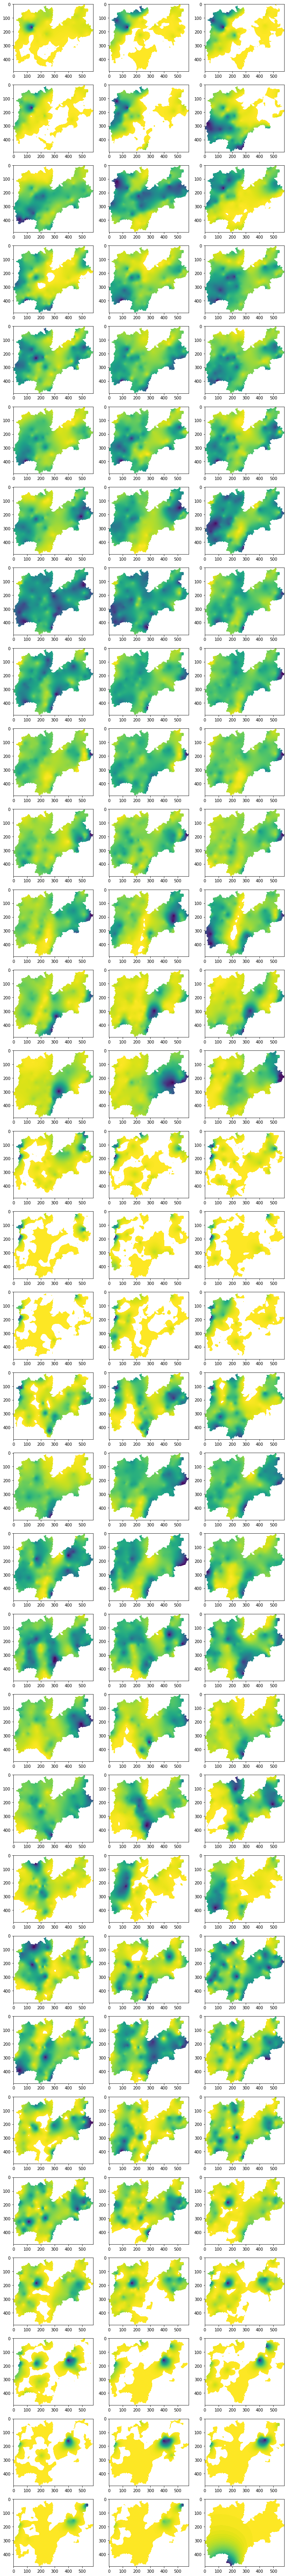

In [49]:
i=0
#fig=plt.figure()
fig=plt.figure(figsize=(12,120))
#fig.subplots_adjust(hspace=0.1, wspace=0.1)
m=1
for item in elev:
    #fig,ax = plt.subplots(figsize=(10,6))     #get the current axes 
    ax=fig.add_subplot(33,3,m)
    ax.set_aspect(1);
    ax.imshow(elev[m-1],cmap="viridis_r")
    #elevplot = ax.imshow(elev[i],cmap="viridis_r") #get the mappable
    # ax.set(title = "Rainfall")
    #if m%3==0:
    #    cbar=plt.colorbar(elevplot, ax=ax);
    # cbar.set_label('Rain (mm)', rotation=270)
    # cbar.ax.get_yaxis().labelpad = 15
    m+=1

In [50]:
elev[0][~np.isnan(elev[0])]

array([0.135, 0.152, 0.147, ..., 0.001, 0.003, 0.   ], dtype=float32)

In [51]:
elev[0][~np.isnan(elev[0])].sum()

52676.066

In [52]:
elev[0][~np.isnan(elev[0])].mean()

0.4122887

In [53]:
elev[0][~np.isnan(elev[0])].max()

8.977

In [65]:
total_precipitation=[]
mean_precipitation=[]
max_precipitation=[]
areal_extent=[]
m=0
for item in elev:
    elevlist = elev[m][~np.isnan(elev[m])]
    elevlist=elevlist.ravel()
    if len(elevlist!=0):
        lenlist= len(elevlist)
        sumlist = elevlist.sum()*cellsize*cellsize*0.001
        meanlist = elevlist.mean()
        maxlist = elevlist.max()
        
    else:
        lenlist =0
        sumlist =0 
        meanlist=0
        maxlist=0
    areal_extent.append(lenlist*cellsize*cellsize/10**6)
    total_precipitation.append(sumlist)
    mean_precipitation.append(meanlist)
    max_precipitation.append(maxlist)
    m+=1
cumulative_precipitation=np.cumsum(total_precipitation)
cumulative_mean_precipitation=np.cumsum(mean_precipitation)

### Areal Extent of precipitations in km$^2$

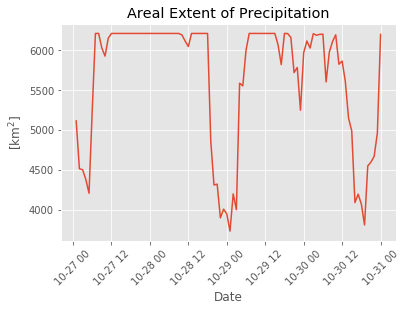

In [58]:
plt.style.use('ggplot')
fg=plt.figure()
ax=fg.add_subplot(111)
ax.plot(dates,areal_extent)
#ax.set_aspect(aspect=0.2)
ax.set_ylabel("[km$^2$]")
ax.set_xlabel("Date")
ax.set_title("Areal Extent of Precipitation")
plt.xticks(rotation=45)
plt.show()

Maximal area extension coincides with the Trentino Area

In [59]:
max(areal_extent)

6206.8

### Total Precipitation

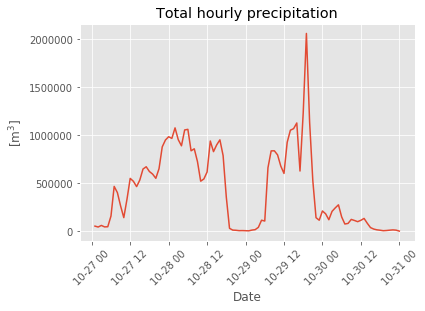

In [60]:
#plt.style.use('ggplot')
fg1=plt.figure()
ax1=fg1.add_subplot(111)
ax1.plot(dates,total_precipitation)
#ax1.set_aspect(aspect=1)
ax1.set_ylabel("[m$^3$]")
ax1.set_xlabel("Date")
ax1.set_title("Total hourly precipitation")
plt.xticks(rotation=45)
plt.show()

### Cumulative precipitation

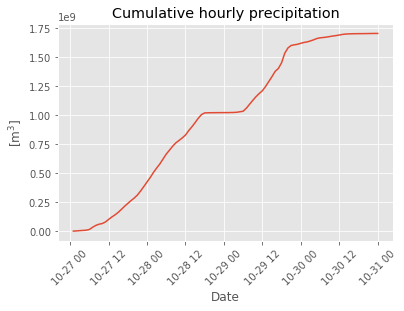

In [66]:
fg2=plt.figure()
ax2=fg2.add_subplot(111)
ax2.plot(dates,cumulative_precipitation)
#ax2.set_aspect(aspect=1)
ax2.set_ylabel("[m$^3$]")
ax2.set_xlabel("Date")
ax2.set_title("Cumulative hourly precipitation")
plt.xticks(rotation=45)
plt.show()

### Mean Precipitation

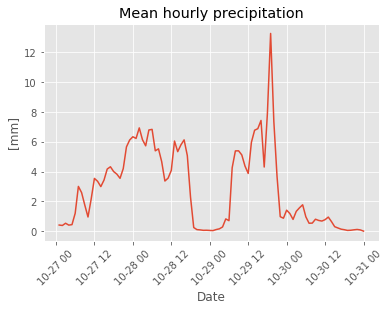

In [62]:
#plt.style.use('ggplot')
fg1=plt.figure()
ax1=fg1.add_subplot(111)
ax1.plot(dates,mean_precipitation)
#ax1.set_aspect(aspect=1)
ax1.set_ylabel("[mm]")
ax1.set_xlabel("Date")
ax1.set_title("Mean hourly precipitation")
plt.xticks(rotation=45)
plt.show()

### Cumulative Precipitation

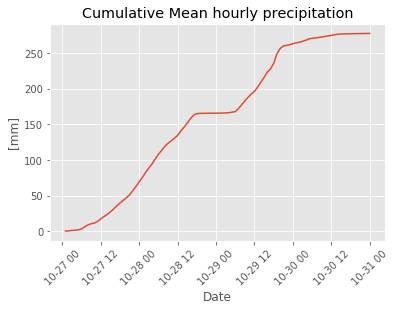

In [67]:
fg4=plt.figure()
ax4=fg4.add_subplot(111)
ax4.plot(dates,cumulative_mean_precipitation)
#ax4.set_aspect(aspect=1)
ax4.set_ylabel("[mm]")
ax4.set_xlabel("Date")
ax4.set_title("Cumulative Mean hourly precipitation")
plt.xticks(rotation=45)
plt.show()

### Maximum hourly precipitation over time (not same location though)

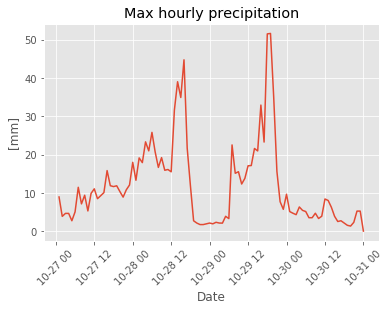

In [64]:
#plt.style.use('ggplot')
fg1=plt.figure()
ax1=fg1.add_subplot(111)
ax1.plot(dates,max_precipitation)
#ax1.set_aspect(aspect=1)
ax1.set_ylabel("[mm]")
ax1.set_xlabel("Date")
ax1.set_title("Max hourly precipitation")
plt.xticks(rotation=45)
plt.show()